# 라이브러리 임포트

In [3]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from keras.layers import Dense, Concatenate,Dropout, Input, Embedding, LSTM, Bidirectional,Flatten,SpatialDropout1D, CuDNNLSTM ,Conv1D,GlobalMaxPooling1D
from keras.models import Model
from keras.models import Sequential
from keras.preprocessing import sequence
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import re
from ckonlpy.tag import Twitter
from konlpy.tag import Mecab
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation,Dropout,SpatialDropout1D
from sklearn.preprocessing import LabelBinarizer
import keras
import keras.preprocessing.text
from keras.preprocessing import sequence
from random import *
from keras.layers import Dense, Dropout, Embedding, LSTM, Bidirectional,SpatialDropout1D, MaxPooling1D
from keras.models import Sequential
from keras.preprocessing import sequence
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping
import copy
from sklearn.metrics import classification_report
from sklearn.metrics import classification_report

Using TensorFlow backend.


# 전체 전처리 



In [4]:
# Mecab, Twitter 형태소 분석기 사용

f = pd.read_excel("./data/emoji_mod.xlsx",header=None)
f.columns = ['label','comments']

# 형태소 분석기

pos_tagger1 = Mecab()
pos_tagger2 = Twitter()

pos_tagger = pos_tagger1

fidx = []
t_result_list = []

t_list = f['comments']

# 형태소 분석이 어려운 샘플은 제외
for idx,t in enumerate(t_list):
    try:
        
        t = re.sub('#', '', t)
        t = re.sub('\'', '', t)
        t = re.sub('\「', '', t)
        t = re.sub('\」', '', t)
        t = re.sub('\,', '', t)
        t = re.sub('#', '', t)
        t = re.sub('@', '', t)
        t = re.sub('\+', '', t)
        t = re.sub('[A-z]', '', t)
        t = re.sub('[0-9]', '', t)
    
        pos = list(pd.DataFrame(pos_tagger1.pos(t))[1])
        pos2 = list(pd.DataFrame(pos_tagger2.pos(t))[1])
        
        if len(t) > 100 or len(pos) == 0 or len(pos2) == 0:
            print(str(idx)+"오류 제외")
        else :
            fidx.append(idx)
    except:
        print(str(idx)+"오류 제외")
    
# 추가 전처리    
f = f.iloc[fidx,:]

/usr/local/lib/python3.6/dist-packages/konlpy/tag/_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


1오류 제외
2오류 제외
34오류 제외
35오류 제외
54오류 제외
60오류 제외
79오류 제외
108오류 제외
123오류 제외
232오류 제외
237오류 제외
259오류 제외
335오류 제외
364오류 제외
381오류 제외
386오류 제외
401오류 제외
411오류 제외
427오류 제외
439오류 제외
561오류 제외
628오류 제외
691오류 제외
706오류 제외
721오류 제외
732오류 제외
800오류 제외
824오류 제외
882오류 제외
887오류 제외
890오류 제외
905오류 제외
986오류 제외
1005오류 제외
1039오류 제외
1055오류 제외
1071오류 제외
1081오류 제외
1129오류 제외
1133오류 제외
1178오류 제외
1232오류 제외
1324오류 제외
1361오류 제외
1367오류 제외
1475오류 제외
1511오류 제외
1535오류 제외
1613오류 제외
1620오류 제외
1630오류 제외
1655오류 제외
1744오류 제외
1825오류 제외
1948오류 제외
2014오류 제외
2031오류 제외
2069오류 제외
2244오류 제외
2257오류 제외
2395오류 제외
2457오류 제외
2541오류 제외
2618오류 제외
2683오류 제외
2700오류 제외
2709오류 제외
2723오류 제외
2757오류 제외
2904오류 제외
2921오류 제외
3002오류 제외
3098오류 제외
3206오류 제외
3226오류 제외
3294오류 제외
3307오류 제외
3351오류 제외
3352오류 제외
3369오류 제외
3663오류 제외
3736오류 제외
3761오류 제외
3768오류 제외
3773오류 제외
3792오류 제외
3858오류 제외
3884오류 제외
3901오류 제외
3905오류 제외
3911오류 제외
4191오류 제외
4196오류 제외
4276오류 제외
4452오류 제외
4457오류 제외
4623오류 제외
4624오류 제외
4710오류 제외
4726오류 제외
4812오류 제외
4874오류 제외
4956오류 제외
4968오류 제외
51

40282오류 제외
40324오류 제외
40331오류 제외
40411오류 제외
40422오류 제외
40515오류 제외
40560오류 제외
40610오류 제외
40612오류 제외
40623오류 제외
40669오류 제외
40702오류 제외
40729오류 제외
40748오류 제외
40772오류 제외
40808오류 제외
40837오류 제외
40844오류 제외
40852오류 제외
40924오류 제외
40927오류 제외
40942오류 제외
41005오류 제외
41138오류 제외
41389오류 제외
41418오류 제외
41448오류 제외
41456오류 제외
41490오류 제외
41509오류 제외
41552오류 제외
41560오류 제외
41597오류 제외
41603오류 제외
41607오류 제외
41627오류 제외
41648오류 제외
41858오류 제외
41861오류 제외
41944오류 제외
41983오류 제외
41992오류 제외
42103오류 제외
42122오류 제외
42124오류 제외
42152오류 제외
42195오류 제외
42254오류 제외
42257오류 제외
42337오류 제외
42366오류 제외
42391오류 제외
42413오류 제외
42419오류 제외
42457오류 제외
42499오류 제외
42519오류 제외
42520오류 제외
42613오류 제외
42658오류 제외
42669오류 제외
42673오류 제외
42733오류 제외
42737오류 제외
42740오류 제외
42766오류 제외
42887오류 제외
42945오류 제외
42985오류 제외
43005오류 제외
43037오류 제외
43046오류 제외
43059오류 제외
43097오류 제외
43157오류 제외
43160오류 제외
43182오류 제외
43184오류 제외
43261오류 제외
43282오류 제외
43334오류 제외
43398오류 제외
43427오류 제외
43534오류 제외
43546오류 제외
43563오류 제외
43605오류 제외
43632오류 제외
43653오류 제외
43757오류 제외
43781오류 제외

In [5]:
BASE_CODE, CHOSUNG, JUNGSUNG = 44032, 588, 28

# 초성 리스트. 00 ~ 18
CHOSUNG_LIST = ['ㄱ', 'ㄲ', 'ㄴ', 'ㄷ', 'ㄸ', 'ㄹ', 'ㅁ', 'ㅂ', 'ㅃ', 'ㅅ', 'ㅆ', 'ㅇ', 'ㅈ', 'ㅉ', 'ㅊ', 'ㅋ', 'ㅌ', 'ㅍ', 'ㅎ']

# 중성 리스트. 00 ~ 20
JUNGSUNG_LIST = ['ㅏ', 'ㅐ', 'ㅑ', 'ㅒ', 'ㅓ', 'ㅔ', 'ㅕ', 'ㅖ', 'ㅗ', 'ㅘ', 'ㅙ', 'ㅚ', 'ㅛ', 'ㅜ', 'ㅝ', 'ㅞ', 'ㅟ', 'ㅠ', 'ㅡ', 'ㅢ', 'ㅣ']

# 종성 리스트. 00 ~ 27 + 1(1개 없음)
JONGSUNG_LIST = [' ', 'ㄱ', 'ㄲ', 'ㄳ', 'ㄴ', 'ㄵ', 'ㄶ', 'ㄷ', 'ㄹ', 'ㄺ', 'ㄻ', 'ㄼ', 'ㄽ', 'ㄾ', 'ㄿ', 'ㅀ', 'ㅁ', 'ㅂ', 'ㅄ', 'ㅅ', 'ㅆ', 'ㅇ', 'ㅈ', 'ㅊ', 'ㅋ', 'ㅌ', 'ㅍ', 'ㅎ']


def convert(test_keyword):
    split_keyword_list = list(test_keyword)
    #print(split_keyword_list)

    result = list()
    for keyword in split_keyword_list:
        # 한글 여부 check 후 분리
       # print(keyword)
        if re.match('.*[ㄱ-ㅎㅏ-ㅣ가-힣]+.*', keyword) is not None:
            try:
                char_code = ord(keyword) - BASE_CODE
                char1 = int(char_code / CHOSUNG)
                if char1==0:  
                    result.append('')
                result.append(CHOSUNG_LIST[char1])
               # print('초성 : {}'.format(CHOSUNG_LIST[char1]))
                char2 = int((char_code - (CHOSUNG * char1)) / JUNGSUNG)
                if char2==0:
                    result.append('')
                result.append(JUNGSUNG_LIST[char2])
              #  print('중성 : {}'.format(JUNGSUNG_LIST[char2]))
                char3 = int((char_code - (CHOSUNG * char1) - (JUNGSUNG * char2)))
                if char3==0:
                    result.append('')
                else:
                    result.append(JONGSUNG_LIST[char3])
               # print('종성 : {}'.format(JONGSUNG_LIST[char3]))
            except:
                result.append(keyword)
        else:
            result.append(keyword)
    # result
    return "".join(result)

# 통합모델

## 형태소 분석 

In [6]:
# Mecab 형태소 분석기 사용
import os 
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"   
os.environ["CUDA_VISIBLE_DEVICES"]="1"

# Random_state
rs = 1

f1 = copy.deepcopy(f)

t_list = f1['comments'].tolist()

# Mecab 형태소 분석기 사용
t_result_list = []

# 형태소 분석결과 아무것도 안나오는 경우
for idx,t in enumerate(t_list):
    try:
        t = re.sub('#', '', t)
        t = re.sub('\'', '', t)
        t = re.sub('\「', '', t)
        t = re.sub('\」', '', t)
        t = re.sub('\,', '', t)
        t = re.sub('#', '', t)
        t = re.sub('@', '', t)
        t = re.sub('\+', '', t)
        t = re.sub('[A-z]', '', t)
        t = re.sub('[0-9]', '', t)
        
        # 조사 제거
        pos = list(pd.DataFrame(pos_tagger.pos(t))[1])
        t = np.array(pos_tagger.morphs(t))
        t = t.tolist()
        t_result_list.append(" ".join(t))
        
    except:
        print(t)
        print(str(idx)+" 제외")

f1['comments'] = t_result_list

# label 교체
label_list1 = f1['label']

X_all1 = f1['comments'].tolist()
X_all_list1 = X_all1
Y_all_list1 = f1['label'].tolist()

X_train1, X_test1,Y_train1,Y_test1 = train_test_split(X_all_list1,Y_all_list1,test_size = 0.2,random_state=rs, stratify=Y_all_list1)


# convert string Label into 0,1 columns (3개의 컬럼)

encoder = LabelBinarizer()

X_train1 = pd.DataFrame(X_train1)
Y_train1 = pd.DataFrame(Y_train1)
all_train1 = pd.concat([X_train1,Y_train1],axis=1)
all_train1.columns=['X','Y']


X_train1 = all_train1['X'].tolist()
Y_train1 = all_train1['Y'].tolist()
Y_train1 = pd.DataFrame(encoder.fit_transform(Y_train1))
Y_test1 = pd.DataFrame(encoder.fit_transform(Y_test1))

# Binary Label인 경우에만

Y_train1[1] = Y_train1[0]
Y_train1[0] = -1*(Y_train1[0]-1)
Y_test1[1] = Y_test1[0]
Y_test1[0] = -1*(Y_test1[0]-1)

max_slen1 = 100
embedding_vecor_length1 = 128

tk = keras.preprocessing.text.Tokenizer(lower=True, split=" ")
tk.fit_on_texts(list(X_train1))

X_all1 = X_train1 + X_test1
X_train1 = tk.texts_to_sequences(X_train1)
X_test1 = tk.texts_to_sequences(X_test1)
X_all1 = tk.texts_to_sequences(X_all1)
#Y_all_arr = np.array(Y_all_df)


X_train1 = sequence.pad_sequences(X_train1, maxlen=max_slen1,padding='pre')
X_test1 = sequence.pad_sequences(X_test1, maxlen=max_slen1,padding='pre')
X_all1 = sequence.pad_sequences(X_all1, maxlen=max_slen1,padding='pre')

nwords1 = X_train1.max() + 1

print("reading data complete")

reading data complete


In [5]:
pos_tagger1.morphs("뜨악")

['뜨악']

## 자모단위

In [7]:
# 댓글 파일 로드

f2 = copy.deepcopy(f)

t_list = f2['comments'].tolist()
t_result_list = []


for t in t_list:
    try:
        t_result_list.append(t)
    except:
        print(str(idx)+" 제외")

# # 추가 전처리    

for i,s in enumerate(t_result_list):
    s = str(s)
    s = s.strip()
    temp_list = s.split(" ")
    
   # 특수문자 제거  
    s = re.sub('#', '', s)
    s = re.sub('\'', '', s)
    s = re.sub('\「', '', s)
    s = re.sub('\」', '', s)
    s = re.sub('\,', '', s)
    s = re.sub('#', '', s)
    s = re.sub('@', '', s)
    s = re.sub('\+', '', s)
    s = re.sub('[A-z]', '', s)
    s = re.sub('[0-9]', '', s)
    s = s.strip()
    
    t_result_list[i] = s

f2['comments'] = t_result_list


# label 2개로
label_list2 = f2['label']

max_slen2 = 500
embedding_vecor_length2 = 128

X_all2 = f2['comments']
X_all_list2 = X_all2.tolist()

for i, comment in enumerate(X_all_list2):
    temp = convert(comment)
    
    # 빈칸제거
    temp = temp.replace(" ","")
    temp2 = ""
    for t in temp:
        temp2 = temp2 + t +  " "
    temp2 = temp2[0:-1]
    X_all_list2[i] = temp2


f2['comments'] = X_all_list2
f2 = f2.reset_index(drop=True)



X_all_list2 = f2['comments'].tolist()

# LABEL을 데이터 프레임 형태로
Y_all_list2 = f2['label'].tolist()
Y_all_df2 = pd.DataFrame(Y_all_list2)

# 숫자 매핑

nwords2 = 320

tk = keras.preprocessing.text.Tokenizer(num_words=nwords2,char_level=True,lower=False, split="")

X_train2,X_test2,Y_train2,Y_test2 = train_test_split(X_all_list2,Y_all_list2,test_size = 0.2,random_state=rs,stratify=Y_all_list2)

tk.fit_on_texts(X_train2)

X_train2 = tk.texts_to_sequences(X_train2)
X_test2 = tk.texts_to_sequences(X_test2)


# convert string Label into 0,1 columns (3개의 컬럼)
encoder = LabelBinarizer()

Y_all_df2 = pd.DataFrame(encoder.fit_transform(Y_train2))
Y_all_df2[1] = Y_all_df2[0]
Y_all_df2[0] = -1*(Y_all_df2[0]-1)
Y_train2 = Y_all_df2

Y_all_df2 = pd.DataFrame(encoder.fit_transform(Y_test2))
Y_all_df2[1] = Y_all_df2[0]
Y_all_df2[0] = -1*(Y_all_df2[0]-1)
Y_test2 = Y_all_df2

X_train2 = sequence.pad_sequences(X_train2, maxlen=max_slen2,padding='pre')
X_test2 = sequence.pad_sequences(X_test2, maxlen=max_slen2,padding='pre')
nwords2 = X_train2.max() + 1
print("reading data complete")

reading data complete


In [10]:
f2

,label,comments
0,2,ㅈ ㅐ ㅇ ㅏ ㅇ ㄴ ㅣ ㅁ ㅇ ㅣ ㅅ ㅣ ㅇ ㅕ ㅇ ㅣ ㅈ ㅔ ㅎ ㅏ ㅇ ㅘ ㅇ ...
1,2,ㅂ ㅏ ㄴ ㄷ ㅏ ㅂ ㅣ ㄴ ㅜ ㄴ ㅍ ㅗ ㄱ ㅌ ㅏ ㄴ ㅁ ㅏ ㅈ ㅇ ㅡ ㅁ ㅆ ...
2,2,ㅉ ㅏ ㅇ ㅊ ㅜ ㅂ ㄸ ㅏ ㅁ ㅗ ㄷ ㅜ ㄷ ㅡ ㄹ ㄱ ㅏ ㅁ ㄱ ㅣ ㅈ ㅗ ㅅ ...
3,2,ㅅ ㅣ ㄹ ㅅ ㅣ ㄱ ㅏ ㄴ ㅇ ㅡ ㄹ ㅗ ㄸ ㅗ ㄴ ㅜ ㄴ ㅍ ㅗ ㄱ ㅌ ㅏ ㄴ ...
4,2,ㅇ ㅕ ㄹ ㅓ ㅂ ㅜ ㄴ ㅁ ㅗ ㄷ ㅜ ㅎ ㅣ ㅁ ㄴ ㅐ ㅅ ㅔ ㅇ ㅛ .
5,2,ㅇ ㅑ ㄱ ㅓ ㄱ ㅣ ㅇ ㅏ ㄴ ㅡ ㄴ ㄷ ㅔ ㄷ ㅏ ㅃ ㅓ ㅇ ㅇ ㅣ ㄹ ㅐ ㅋ ...
6,1,ㄸ ㅏ ㅇ ㅎ ㅡ ㄴ ㄷ ㅡ ㄹ ㄹ ㅣ ㅁ ㄴ ㅡ ㄲ ㅣ ㄹ ㅈ ㅓ ㅇ ㄷ ㅗ ㅈ ...
7,2,. . . . ㅊ ㅣ ㅁ ㅁ ㅜ ㄱ . . . . ㅇ ㅜ ㄹ ㅣ ㅎ ㅏ ㄱ ㄱ ㅛ ...
8,1,ㅎ ㅐ ㅅ ㅂ ㅣ ㅊ ㅇ ㅣ ㄸ ㅏ ㅅ ㅡ ㅎ ㅏ ㅈ ㅣ ㅊ ㅏ ㄴ ㅂ ㅏ ㄹ ㅏ ...
9,2,ㄱ ㅣ ㅇ ㅓ ㄱ ㄴ ㅏ ㄴ ㄷ ㅏ ㄱ ㅣ ㅇ ㅓ ㄱ ㄴ ㅏ ㅇ ㅣ ㅉ ㅏ ㄹ ㅂ ...


# 한글자단위

In [8]:
# Mecab 형태소 분석기 사용

f3 = copy.deepcopy(f)

t_list = f3['comments'].tolist()

# Mecab 형태소 분석기 사용
t_result_list = []

# 형태소 분석결과 아무것도 안나오는 경우
for idx,t in enumerate(t_list):
    try:
        t = re.sub('#', '', t)
        t = re.sub('\'', '', t)
        t = re.sub('\「', '', t)
        t = re.sub('\」', '', t)
        t = re.sub('\,', '', t)
        t = re.sub('#', '', t)
        t = re.sub('@', '', t)
        t = re.sub('\+', '', t)
        t = re.sub('[A-z]', '', t)
        t = re.sub('[0-9]', '', t)
        t = t.strip()
        
        # 조사 제거
        t = t.replace(" ", "") 
        t = list(t)
        t_result_list.append(" ".join(t))
        
    except:
        print(str(idx)+" 제외")


f3['comments'] = t_result_list

# label 교체
label_list3 = f3['label']

X_all3 = f3['comments'].tolist()
X_all_list3 = X_all3
Y_all_list3 = f3['label'].tolist()

X_train3, X_test3,Y_train3,Y_test3 = train_test_split(X_all_list3,Y_all_list3,test_size = 0.2,random_state=rs, stratify=Y_all_list3)


# convert string Label into 0,1 columns (3개의 컬럼)

encoder = LabelBinarizer()

X_train3 = pd.DataFrame(X_train3)
Y_train3 = pd.DataFrame(Y_train3)
all_train3 = pd.concat([X_train3,Y_train3],axis=1)
all_train3.columns=['X','Y']


X_train3 = all_train3['X'].tolist()
Y_train3 = all_train3['Y'].tolist()
Y_train3 = pd.DataFrame(encoder.fit_transform(Y_train3))
Y_test3 = pd.DataFrame(encoder.fit_transform(Y_test3))

# Binary Label인 경우에만

Y_train3[1] = Y_train3[0]
Y_train3[0] = -1*(Y_train3[0]-1)
Y_test3[1] = Y_test3[0]
Y_test3[0] = -1*(Y_test3[0]-1)

max_slen3 = 100
embedding_vecor_length3 = 128

tk = keras.preprocessing.text.Tokenizer(lower=True, split=" ")
tk.fit_on_texts(list(X_train3))

X_all3 = X_train3 + X_test3
X_train3 = tk.texts_to_sequences(X_train3)
X_test3 = tk.texts_to_sequences(X_test3)
X_all3 = tk.texts_to_sequences(X_all3)
#Y_all_arr = np.array(Y_all_df)


X_train3 = sequence.pad_sequences(X_train3, maxlen=max_slen3,padding='pre')
X_test3 = sequence.pad_sequences(X_test3, maxlen=max_slen3,padding='pre')
X_all3 = sequence.pad_sequences(X_all3, maxlen=max_slen3,padding='pre')

nwords3 = X_train3.max() + 1

print("reading data complete")

reading data complete


# 형태소 분석 (Twitter)

In [9]:
# Mecab 형태소 분석기 사용
import os 
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"   
os.environ["CUDA_VISIBLE_DEVICES"]="1"

# Random_state

f4 = copy.deepcopy(f)

t_list = f4['comments'].tolist()

# Mecab 형태소 분석기 사용
t_result_list = []

# 형태소 분석결과 아무것도 안나오는 경우
for idx,t in enumerate(t_list):
    try:
        t = re.sub('#', '', t)
        t = re.sub('\'', '', t)
        t = re.sub('\「', '', t)
        t = re.sub('\」', '', t)
        t = re.sub('\,', '', t)
        t = re.sub('#', '', t)
        t = re.sub('@', '', t)
        t = re.sub('\+', '', t)
        t = re.sub('[A-z]', '', t)
        t = re.sub('[0-9]', '', t)

        
        # 조사 제거
        pos = list(pd.DataFrame(pos_tagger2.pos(t))[1])
        t = np.array(pos_tagger2.morphs(t))
        t = t.tolist()
        t_result_list.append(" ".join(t))
        
    except:
        print(t)
        print(str(idx)+" 제외")

f4['comments'] = t_result_list

# label 교체
label_list4 = f4['label']

X_all4 = f4['comments'].tolist()
X_all_list4 = X_all4
Y_all_list4 = f4['label'].tolist()

X_train4, X_test4,Y_train4,Y_test4 = train_test_split(X_all_list4,Y_all_list4,test_size = 0.2,random_state=rs, stratify=Y_all_list4)


# convert string Label into 0,1 columns (3개의 컬럼)

encoder = LabelBinarizer()

X_train4 = pd.DataFrame(X_train4)
Y_train4 = pd.DataFrame(Y_train4)
all_train4 = pd.concat([X_train4,Y_train4],axis=1)
all_train4.columns=['X','Y']


X_train4 = all_train4['X'].tolist()
Y_train4 = all_train4['Y'].tolist()
Y_train4 = pd.DataFrame(encoder.fit_transform(Y_train4))
Y_test4 = pd.DataFrame(encoder.fit_transform(Y_test4))

# Binary Label인 경우에만

Y_train4[1] = Y_train4[0]
Y_train4[0] = -1*(Y_train4[0]-1)
Y_test4[1] = Y_test4[0]
Y_test4[0] = -1*(Y_test4[0]-1)

max_slen4 = 100
embedding_vecor_length4 = 128

tk = keras.preprocessing.text.Tokenizer(lower=True, split=" ")
tk.fit_on_texts(list(X_train4))

X_all4 = X_train4 + X_test4
X_train4 = tk.texts_to_sequences(X_train4)
X_test4 = tk.texts_to_sequences(X_test4)
X_all4 = tk.texts_to_sequences(X_all4)
#Y_all_arr = np.array(Y_all_df)


X_train4 = sequence.pad_sequences(X_train4, maxlen=max_slen4,padding='pre')
X_test4 = sequence.pad_sequences(X_test4, maxlen=max_slen4,padding='pre')
X_all4 = sequence.pad_sequences(X_all4, maxlen=max_slen4,padding='pre')

nwords4 = X_train4.max() + 1

print("reading data complete")

reading data complete


In [14]:
# Bi-LSTM (형태소, 문자단위

import keras.backend.tensorflow_backend as K
NUM_FILTERS = 64
NUM_WORDS = 3 
early_stopping = EarlyStopping(monitor='val_loss',patience=1,restore_best_weights=True)

with K.tf.device('/gpu:0'):
    model1 = Sequential()
    model1.add(Embedding(nwords1, embedding_vecor_length1, input_length=max_slen1))
    model1.add(SpatialDropout1D(0.2))
    model1.add(Conv1D(filters=NUM_FILTERS, kernel_size=NUM_WORDS, activation="relu")) 
    model1.add(Dropout(0.2)) 
    model1.add(Bidirectional(LSTM(64, dropout=0.2, recurrent_dropout=0.2)))    
    model1.add(Dropout(0.2))
    model1.add(Dense(64,activation='relu'))

    model2 = Sequential()
    model2.add(Embedding(nwords2, embedding_vecor_length2, input_length=max_slen2))
    model2.add(SpatialDropout1D(0.2)) 
    model2.add(Conv1D(filters=NUM_FILTERS, kernel_size=NUM_WORDS, activation="relu")) 
    model2.add(Dropout(0.2)) 
    model2.add(Bidirectional(LSTM(64, dropout=0.2, recurrent_dropout=0.2)))
    model2.add(Dropout(0.2))
    model2.add(Dense(64, activation='relu'))

    model3 = Sequential()
    model3.add(Embedding(nwords3, embedding_vecor_length3, input_length=max_slen3))
    model3.add(SpatialDropout1D(0.2)) 
    model3.add(Conv1D(filters=NUM_FILTERS, kernel_size=NUM_WORDS, activation="relu")) 
    model3.add(Dropout(0.2)) 
    model3.add(Bidirectional(LSTM(64, dropout=0.2, recurrent_dropout=0.2)))
    model3.add(Dropout(0.2))
    model3.add(Dense(64, activation='relu'))
    
    model4 = Sequential()
    model4.add(Embedding(nwords4, embedding_vecor_length4, input_length=max_slen4))
    model4.add(SpatialDropout1D(0.2)) 
    model4.add(Conv1D(filters=NUM_FILTERS, kernel_size=NUM_WORDS, activation="relu")) 
    model4.add(Dropout(0.2)) 
    model4.add(Bidirectional(LSTM(64, dropout=0.2, recurrent_dropout=0.2)))
    model4.add(Dropout(0.2))
    model4.add(Dense(64, activation='relu'))

    model_input1 = Input((max_slen1,))
    model_input2 = Input((max_slen2,))
    model_input3 = Input((max_slen3,))
    model_input4 = Input((max_slen4,))
    
    out1 = model1(model_input1)   
    out2 = model2(model_input2)
    out3 = model3(model_input3)
    out4 = model4(model_input4)

    out = Concatenate()([out1,out2,out3,out4])
    out = Dense(2, activation='softmax')(out)

    model = Model([model_input1,model_input2,model_input3,model_input4],out)
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    history= model.fit([X_train1,X_train2,X_train3,X_train4],Y_train1, epochs=20, batch_size=512,validation_data=([X_test1,X_test2,X_test3,X_test4],Y_test1),shuffle=False,callbacks=[early_stopping])

Train on 39192 samples, validate on 9798 samples
Epoch 1/20
39192/39192 [==============================] - 271s 7ms/step - loss: 0.5567 - acc: 0.6957 - val_loss: 0.4421 - val_acc: 0.7966
Epoch 2/20
39192/39192 [==============================] - 253s 6ms/step - loss: 0.3714 - acc: 0.8372 - val_loss: 0.4567 - val_acc: 0.7933


In [2]:
from tensorflow.python.client import device_lib

print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 3013121764216889199
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 11518312475786113167
physical_device_desc: "device: XLA_GPU device"
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 7803698030112351259
physical_device_desc: "device: XLA_CPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 3609329664
locality {
  bus_id: 2
  numa_node: 1
  links {
  }
}
incarnation: 1899425493517144425
physical_device_desc: "device: 0, name: Tesla M4, pci bus id: 0000:88:00.0, compute capability: 5.2"
]


In [15]:
result1 = model.predict([X_test1,X_test2,X_test3,X_test4])

In [17]:
result1

array([[0.46767896, 0.532321  ],
       [0.9220045 , 0.07799552],
       [0.60541874, 0.3945813 ],
       ...,
       [0.7698541 , 0.23014584],
       [0.10871357, 0.89128643],
       [0.38254112, 0.6174588 ]], dtype=float32)

In [23]:
# Negative Prob

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import fbeta_score

X_train1, X_test1,Y_train1,Y_test1 = train_test_split(X_all_list1,Y_all_list1,test_size = 0.2,random_state=rs, stratify=Y_all_list1)
Y_test1 = np.array(Y_test1) -1
y_true = Y_test1

thres_list = (np.arange(0.1, 1, 0.01)).tolist()
result_list = []
for thres in thres_list:
    temp_result1 = result1
    temp_result1 = (temp_result1[:,1] > thres)
    temp_result1 = temp_result1.astype(int)
    temp_result1 = temp_result1.tolist()
    y_pred = temp_result1
    
    acc = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    fbeta = fbeta_score(y_true, y_pred, 0.5)
    
    
    result_list.append([thres,len(result1) - sum(temp_result1),sum(temp_result1),acc,precision,recall,fbeta])
    
result_df = pd.DataFrame(result_list)
result_df.columns = ['Threshold','#of Pos Samples','#of Neg Samples', 'Acc','Precision','Recall','Fbeta(0.5)']


,Threshold,#of Pos Samples,#of Neg Samples,Acc,Precision,Recall,Fbeta(0.5)
0,0.10,1934,7864,0.617575,0.536241,0.976836,0.589411
1,0.11,2070,7728,0.628802,0.543996,0.973824,0.596668
2,0.12,2206,7592,0.639212,0.551502,0.969886,0.603575
3,0.13,2316,7482,0.649010,0.558674,0.968265,0.610308
4,0.14,2430,7368,0.657991,0.565554,0.965254,0.616621
5,0.15,2560,7238,0.666973,0.572810,0.960389,0.623103
6,0.16,2674,7124,0.673913,0.578748,0.955061,0.628257
7,0.17,2804,6994,0.684119,0.587361,0.951587,0.636051
8,0.18,2905,6893,0.692182,0.594371,0.949039,0.642385
9,0.19,3017,6781,0.698510,0.600501,0.943248,0.647562


In [27]:
result_df[30:]

,Threshold,#of Pos Samples,#of Neg Samples,Acc,Precision,Recall,Fbeta(0.5)
30,0.40,4872,4926,0.787814,0.727162,0.829743,0.745598
31,0.41,4957,4841,0.789549,0.732906,0.821867,0.749124
32,0.42,5048,4750,0.790059,0.737895,0.811906,0.751598
33,0.43,5130,4668,0.790467,0.742502,0.802872,0.753839
34,0.44,5198,4600,0.791488,0.747174,0.796155,0.756482
35,0.45,5269,4529,0.792611,0.752263,0.789205,0.759372
36,0.46,5343,4455,0.794856,0.758923,0.783183,0.763654
37,0.47,5413,4385,0.797510,0.766021,0.778087,0.768404
38,0.48,5476,4322,0.798224,0.770708,0.771601,0.770886
39,0.49,5552,4246,0.797408,0.774611,0.761872,0.772029


Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.8461')

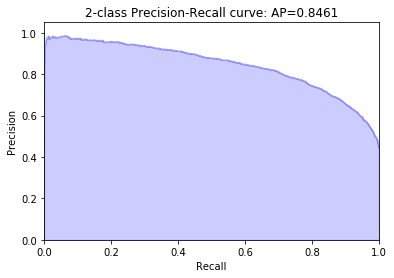

In [31]:
# Ap score
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
from inspect import signature
from sklearn.metrics import average_precision_score

average_precision = average_precision_score(y_true, pd.DataFrame(result1)[1].tolist())
precision, recall, _ = precision_recall_curve(y_true, pd.DataFrame(result1)[1].tolist())

step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.4f}'.format(average_precision))

Text(0.5, 1.0, 'Performance ')

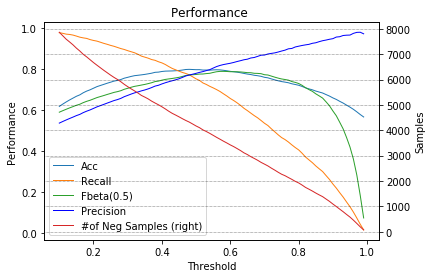

In [32]:
# Cutoff Selection

# Plot y1
ax = result_df.plot(x='Threshold',y='Acc',legend=True,linewidth='1')
ax = result_df.plot(x='Threshold',y='Recall', ax=ax,legend=True, linewidth='1')
ax = result_df.plot(x='Threshold',y='Fbeta(0.5)', ax=ax,legend=True, linewidth='1') 
ax = result_df.plot(x='Threshold',y='Precision', ax=ax,legend=True,linewidth='1',
                    color='b')
plt.ylabel('Performance')

# Plot y2
ax = result_df.plot(x='Threshold',y='#of Neg Samples', ax=ax,legend=True,linewidth='1',
                    secondary_y=True)
plt.ylabel('Samples')

plt.grid(which='major', linestyle=':', linewidth='0.5', color='black')
plt.title('Performance ')